In [ ]:
'''
【项目03】  知乎数据清洗整理和结论研究

作业要求：
1、数据清洗 - 去除空值
要求：创建函数
提示：fillna方法填充缺失数据，注意inplace参数

2、问题1 知友全国地域分布情况，分析出TOP20
要求：
① 按照地域统计 知友数量、知友密度（知友数量/城市常住人口），不要求创建函数
② 知友数量，知友密度，标准化处理，取值0-100，要求创建函数
③ 通过多系列柱状图，做图表可视化
提示：
① 标准化计算方法 = (X - Xmin) / (Xmax - Xmin)
② 可自行设置图表风格

3、问题2 知友全国地域分布情况，分析出TOP20
要求：
① 按照学校（教育经历字段） 统计粉丝数（‘关注者’）、关注人数（‘关注’），并筛选出粉丝数TOP20的学校，不要求创建函数
② 通过散点图 → 横坐标为关注人数，纵坐标为粉丝数，做图表可视化
③ 散点图中，标记出平均关注人数（x参考线），平均粉丝数（y参考线）
提示：
① 可自行设置图表风格

'''

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rc('grid', alpha=0.8, linestyle='--', color='#b0b0b0', linewidth='0.8') 
matplotlib.rcParams['axes.grid'] = True

#指定默认字体
#matplotlib.rcParams['font.sans-serif'] = ['RobotoMono'] #指定默认字体  
# 用来正常显示负号
#plt.rcParams['axes.unicode_minus']=False

% matplotlib inline

In [9]:
from matplotlib.font_manager import FontManager, FontProperties
def getChineseFont():  
    return FontProperties(fname='/System/Library/Fonts/PingFang.ttc')  

In [2]:

#读取知乎数据
df1 = pd.read_csv('知乎数据_201701_utf8.csv', engine='python', encoding='utf-8')
df1.head()

,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,NaN,NaN,邮政,NaN,NaN
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,NaN,重庆,互联网,重庆邮电大学,NaN
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,NaN,NaN,1.0,0.0,21.0,NaN,NaN,NaN,NaN,NaN
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,NaN,NaN,财务,NaN,NaN
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,NaN


In [3]:
df2 = pd.read_csv('六普常住人口数_utf8.csv', engine='python', encoding='utf-8')
df2.head()

,省,地区,结尾,常住人口
0,安徽省,安徽省,省,59500468.0
1,安徽省,安庆市,市,5311379.0
2,安徽省,蚌埠市,市,3164467.0
3,安徽省,亳州市,市,4850657.0
4,安徽省,巢湖市,市,3873102.0


In [4]:
#清洗数据
def data_clean(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna('缺失数据',inplace=True)
        else:
            df[col].fillna(0, inplace=True)
    return df
            
df1_cleaned = data_clean(df1)
df1_cleaned.head(10)
    

,_id,关注的收藏夹,关注,关注者,关注的问题,关注的话题,关注的专栏,职业1,职业2,回答,提问,收藏,个人简介,居住地,所在行业,教育经历,职业经历
0,587598f89f11daf90617fb7a,52,17,1,30,58,2,交通仓储,邮政,0.0,0.0,3.0,缺失数据,缺失数据,邮政,缺失数据,缺失数据
1,587598f89f11daf90617fb7c,27,73,15,87,26,1,高新科技,互联网,56.0,4.0,14.0,缺失数据,重庆,互联网,重庆邮电大学,缺失数据
2,587598f89f11daf90617fb7e,72,94,1,112,20,4,缺失数据,缺失数据,1.0,0.0,21.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据
3,587598f89f11daf90617fb80,174,84,8,895,30,7,金融,财务,0.0,0.0,22.0,缺失数据,缺失数据,财务,缺失数据,缺失数据
4,587598f89f11daf90617fb82,3,236,64,119,44,17,金融,证券投资,6.0,0.0,12.0,无求 心静 魔不生,上海,证券投资,雪城大学（Syracuse University）,缺失数据
5,587598f89f11daf90617fb84,15,577,46,7472,131,81,缺失数据,缺失数据,0.0,0.0,21.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据
6,587598f89f11daf90617fb86,13,52,3,47,2,6,缺失数据,缺失数据,0.0,0.0,0.0,大王叫我来巡山。,缺失数据,缺失数据,缺失数据,缺失数据
7,587598f89f11daf90617fb88,105,104,2,55,46,13,高新科技,电子商务,0.0,0.0,0.0,缺失数据,山东,电子商务,缺失数据,缺失数据
8,587598f89f11daf90617fb8a,795,268,39,49,1,69,高新科技,互联网,0.0,0.0,0.0,缺失数据,缺失数据,互联网,缺失数据,缺失数据
9,587598f89f11daf90617fb8c,8,111,3,31,6,3,缺失数据,缺失数据,0.0,0.0,2.0,缺失数据,缺失数据,缺失数据,缺失数据,缺失数据


    city  count
23    北京   4165
72    广东   3948
565   上海   3117
363   江苏   1951
672   浙江   1738
268   湖北   1133
591   四川   1124
511   山东   1023
556   陕西    795
26    福建    784
192   河南    632
301   湖南    539
675   重庆    469
434   辽宁    447
599   天津    447
0     安徽    400
164   河北    322
236  黑龙江    263
401   江西    241
541   山西    223


<Container object of 20 artists>

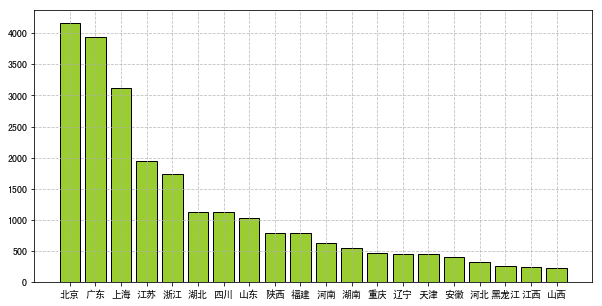

In [5]:
data_city = df1_cleaned.groupby('居住地').count()
data_city.tail(10)
df2['city'] = df2['地区'].str[:-1]
data = pd.merge(data_city, df2, left_index=True, right_on='city', how='inner')[['_id','city','常住人口']]
data.rename(columns={'_id':'count'}, inplace=True) #将 _id 的列名修改为 count
# data.head()

data_count = data.sort_values(by=['count'],ascending=False)[['city','count']].iloc[:20]
print(data_count)
plt.figure(figsize=(10,5))
plt.bar(range(20), data_count['count'],width=0.8, facecolor = 'yellowgreen', edgecolor='k', tick_label=data_count['city'])

/Users/zhangjifeng/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/matplotlibrc
/Users/zhangjifeng/.matplotlib
